<a href="https://colab.research.google.com/github/skhadem/numerical-analysis-class/blob/master/Homework/Solutions/HW10/hw10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicHermiteSpline

In [2]:
# y'
f = lambda t : np.cos(t)

In [3]:
# True sol
F = lambda t: np.sin(t)

# Problem 2d

In [4]:
def eq_4(f, F, tspan, y0, h=0.1, dense_output=False):
  """F should be the true solution"""
  n = int( (tspan[1] - tspan[0])/h ) + 1

  t, h = np.linspace(tspan[0],tspan[1], num=n, retstep=True)

  w = np.zeros(n)
  dydt = np.zeros(n)
  w[0] = y0
  w[1] = F(t[1]) # init using the true sol
  dydt[0] = f(t[0])

  for i in range(2, n):
    dydt[i-1] = f(t[i-1])
    w[i] = 4*w[i-1] - 3*w[i-2] - 2*h*dydt[i-2]

  if dense_output is True:
    sol = CubicHermiteSpline(t,w,dydt)
    return t, w, sol
  else:  
    return t, w

In [5]:
t_hist, w_hist, sol = eq_4(f, F, [0, 0.1], 0, h=1e-2, dense_output=True)

In [6]:
# Make sure the last value is 0.1097
w_hist[-1]

0.10967021821434067

In [7]:
def eq_5(f, F, tspan, y0, h=0.1, dense_output=False):
  """F should be the true solution"""
  n = int( (tspan[1] - tspan[0])/h ) + 1

  t, h = np.linspace(tspan[0],tspan[1], num=n, retstep=True)

  w = np.zeros(n)
  dydt = np.zeros(n)
  w[0] = y0
  w[1] = F(t[1])
  dydt[0] = f(t[0])
  dydt[1] = f(t[1])

  for i in range(2, n):
    dydt[i] = f(t[i])
    w[i] = (4*w[i-1] - w[i-2] + 2*h*dydt[i])/3
    
  if dense_output is True:
    sol = CubicHermiteSpline(t,w,dydt)
    return t, w, sol
  else:  
    return t, w

In [8]:
t_hist, w_hist, sol = eq_5(f, F, [0, 0.1], 0, h=1e-2, dense_output=True)

In [9]:
# Make sure the last value is 0.0998
w_hist[-1]

0.09983058781258265

# Problem 2e

## Eq 4

In [10]:
hs = np.logspace(-2, -6, 10)
errors = []
true_sol = F(0.1)
for h in hs:
  _, w_hist = eq_4(f, F, [0, 0.1], 0, h=h, dense_output=False)
  errors.append(np.abs(w_hist[-1] - true_sol))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


/usr/local/lib/python3.6/dist-packages/matplotlib/ticker.py:2471: RuntimeWarning: overflow encountered in power
  ticklocs = b ** decades
/usr/local/lib/python3.6/dist-packages/matplotlib/ticker.py:2314: RuntimeWarning: invalid value encountered in double_scalars
  return abs(x - np.round(x)) < atol
/usr/local/lib/python3.6/dist-packages/matplotlib/ticker.py:1106: RuntimeWarning: invalid value encountered in double_scalars
  coeff = round(x / b ** exponent)


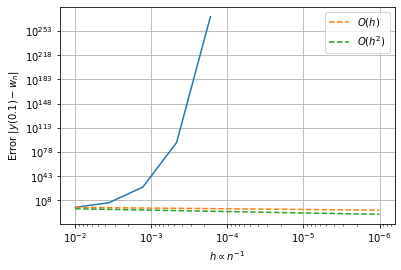

In [11]:
plt.loglog(hs, errors)
plt.loglog(hs, hs,'--',label='$O(h)$')
plt.loglog(hs, hs**2,'--',label='$O(h^2)$')
plt.grid()
plt.legend()
plt.ylabel('Error $|y(0.1) - w_n|$')
plt.gca().invert_xaxis()
plt.xlabel('$h \propto n^{-1}$')
plt.show()

## Eq 5

In [12]:
hs = np.logspace(-2, -6, 10)
errors = []
true_sol = F(0.1)
for h in hs:
  _, w_hist = eq_5(f, F, [0, 0.1], 0, h=h, dense_output=False)
  errors.append(np.abs(w_hist[-1] - true_sol))

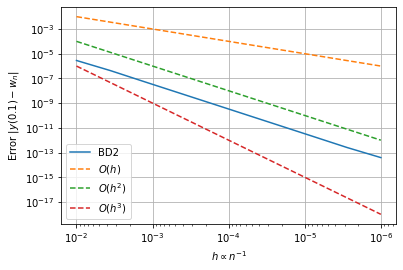

In [13]:
plt.loglog(hs, errors, label='BD2')
plt.loglog(hs, hs,'--',label='$O(h)$')
plt.loglog(hs, hs**2,'--',label='$O(h^2)$')
plt.loglog(hs, hs**3,'--',label='$O(h^3)$')
plt.grid()
plt.legend()
plt.ylabel('Error $|y(0.1) - w_n|$')
plt.gca().invert_xaxis()
plt.xlabel('$h \propto n^{-1}$')
plt.show()

In [14]:
errors

[2.8288342455023985e-06,
 4.311423807412673e-07,
 5.503464178824302e-08,
 7.148907146814487e-09,
 9.251516636110679e-10,
 1.195011173349414e-10,
 1.5445103529465598e-11,
 1.9935719741681623e-12,
 2.5579538487363607e-13,
 3.895495037653518e-14]

In [15]:
hs

array([1.00000000e-02, 3.59381366e-03, 1.29154967e-03, 4.64158883e-04,
       1.66810054e-04, 5.99484250e-05, 2.15443469e-05, 7.74263683e-06,
       2.78255940e-06, 1.00000000e-06])

An error of $10^{-10}$ occurs after h gets smaller than $10^{-4}$

# Problem 1f

As expected, the first method (eq 4) is not stable. This leads to the error blowing up. The second (implicit) method is stable, so it converges at approximately $\mathcal{O}(h^2.5)$